# NLP Clustering Prototype

## Step 1: Test Installation

In this step, we'll verify that all necessary dependencies are installed and working. We'll import key libraries, check their versions, load a spaCy model, and run a simple language detection test.

In [ ]:
# Import dependencies
import pandas as pd
import spacy
from langdetect import detect

# Print version information for troubleshooting
print("Pandas version:", pd.__version__)

# Load spaCy's English model to verify it is installed correctly
try:
    nlp = spacy.load("en_core_web_sm")
    print("spaCy model 'en_core_web_sm' loaded successfully!")
except Exception as e:
    print("Error loading spaCy model:", e)

# Test language detection on some sample text
sample_text = "Hello World"
detected_language = detect(sample_text)
print(f"Language detection test on '{sample_text}': {detected_language} detected.")

## Step 2: Perform Initial Cleaning of Raw Data

In this step, we run our pre-processing script to clean up the raw input data. The script produces an output file in the `data/processed/` folder, which we'll use in subsequent steps. After running the script, we load the cleaned data and calculate some basic metrics.

In [ ]:
# Run the pre-processing script that cleans the raw data
%run ../scripts/preprocess_cleaning.py

# Load the cleaned data
df = pd.read_csv('../data/processed/cleaned_data_example.csv')

# Calculate metrics
total_cases = len(df)
cases_with_missing = df[['text 1 missing', 'text 2 missing', 'text 3 missing']] \
    .apply(lambda row: 'Y' in row.values, axis=1).sum()

print("Initial Data Cleaning Metrics:")
print(f"Total Cases Processed: {total_cases}")
print(f"Cases with one or more missing text fields: {cases_with_missing}")

## Step 3: Perform Language Detection on Cleaned Data

In this step, we take the cleaned data produced in Step 2 and run the language detection script. This script analyzes the "all text" field and adds a new column "language" with the detected language code. After running the script, we load the output and display the count of cases per detected language.

In [ ]:
# Run the language detection script
%run ../scripts/preprocess_langdetect.py

# Load the output from language detection
df = pd.read_csv('../data/processed/langdetect_data_example.csv')

# Calculate and display metrics for detected languages
language_counts = df['language'].value_counts()
print("Detected Languages and Case Counts:")
for lang, count in language_counts.items():
    print(f"{lang}: {count}")

## Step 4: Use Helsinki NLP to Translate Non-English Fields into English

In this step, we run our Helsinki NLP script which:
- Checks the detected language from Step 3.
- Downloads the appropriate Helsinki translation pipeline if needed.
- Translates non-English text from the "all text" column into English.
- Saves the translated text in a new column for easier downstream processing.

In [ ]:
# Run the Helsinki NLP translation script
%run ../scripts/preprocess_helsinki_nlp.py

# Load the output CSV with the translated text
df_translated = pd.read_csv('../data/processed/translated_data_example.csv')

# Print metrics to verify translation results
total_cases = len(df_translated)
translated_cases = df_translated[df_translated['language'] != 'en'].shape[0]
# Count how many rows have a different value in 'translated_text' compared to the original 'all text'
changed_text_count = (df_translated['translated_text'] != df_translated['all text']).sum()

print("Translation Metrics:")
print(f"Total Cases Processed: {total_cases}")
print(f"Cases with non-English text (translated): {translated_cases}")
print(f"Cases where translation modified the text: {changed_text_count}")

## Step 5: Use SpaCy to Tokenize the English Text

In this step, we run our SpaCy tokenization script which performs the following:
- Loads the translated English text.
- Tokenizes and processes the text (e.g., removing punctuation, lowercasing, etc.).
- Prepares the text for clustering by generating token IDs or embeddings.
This is the final data preparation step before we proceed to clustering.

In [ ]:
# Run the SpaCy tokenization script
%run ../scripts/nlp_tokenizing.py

# Load the output CSV with the tokenized text
df_tokenized = pd.read_csv('../data/processed/tokenized_data_example.csv')

# Print metrics to verify tokenization results
total_cases = len(df_tokenized)
first_translated_case = df_tokenized['translated_text'].iloc[0]
first_tokenized_case = df_tokenized['tokenized_text'].iloc[0]

print("Tokenization Metrics:")
print(f"Total Cases Processed: {total_cases}")
print(f"Input Sample:, {first_translated_case}")
print(f"Output Sample:, {first_tokenized_case}")

## Step 6: Use a Sentence Transformer Model to create embeddings then cluster topics with K-Means

Finally, we will run our clustering script, which does this following:
- Generates document embeddings using the Sentence Transformer model `all-MiniLM-L6-v2`.
- Uses the "Elbow Method" technique to help choose the optimal number of clusters, aka the K in K-Means.
- Runs K-Means clustering on the embeddings, where K is the value from the last step.

read the output from the previous step


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embeddings generated.


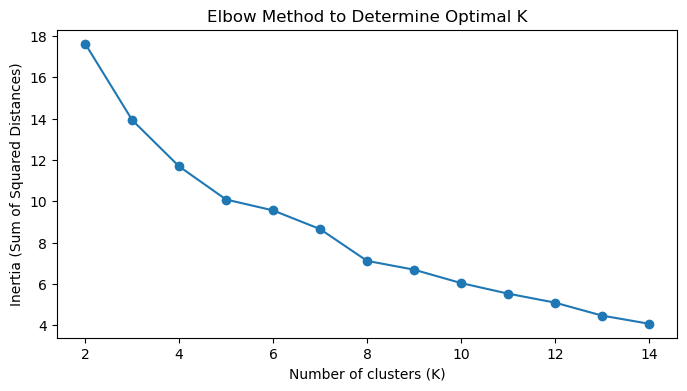

Using K = 5 for clustering.
Clustering complete. Sample cluster labels:
                                     translated_text  cluster_label
0  I don't know where to find a feature in the mo...              0
1  I don't know how to renew a subscription of a ...              1
2  The feature won't work properly Suggested rein...              4
3  I don't know where to find a feature in the mo...              0
4  I don't know how to renew a subscription of a ...              1
Clustering complete.


In [1]:
# Run the SpaCy tokenization script
%run ../scripts/nlp_clustering.py

## Step 7: Review the Results

We now have our final results. Take a look at the final output's `cluster_label` column to see how well the clustering did. Feel free to experiment with different values for `optimal_k` in the previous step to increase or decrease the amount of clusters if further fine-tuning is needed.